In [1]:
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

import requests
from io import BytesIO
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
def diffusion_function(image_path, prompt, init_img):

    device = "cuda"
    model_path = "CompVis/stable-diffusion-v1-4"

    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        model_path,
        revision="fp16",
        torch_dtype=torch.float16,
        use_auth_token=True
    )
    pipe = pipe.to(device)

    generator = torch.Generator(device=device).manual_seed(1024)
    with autocast("cuda"):
        # image = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
        new_img = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5, generator=generator).images[0]

    return new_img

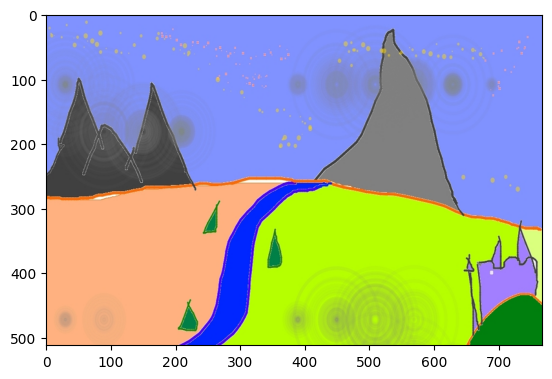

safety_checker\model.safetensors not found
Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

<PIL.Image.Image image mode=RGB size=768x512 at 0x19E9E04CE50>
<class 'PIL.Image.Image'>


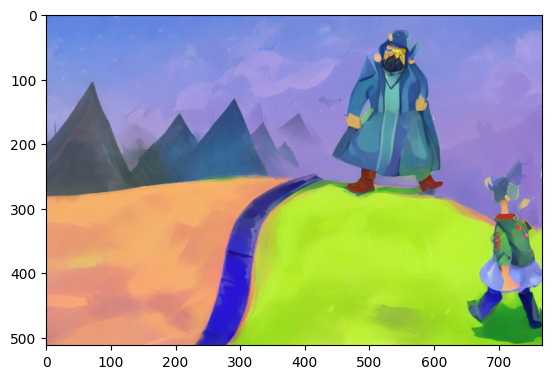

In [11]:
if __name__ == "__main__":
    
    image_path = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
    # prompt = "A fantasy landscape, trending on artstation"
    prompt = "only need one character, trending on artstation, children will like it, no background"
 
    response = requests.get(image_path)
    init_img = Image.open(BytesIO(response.content)).convert("RGB")
    init_img = init_img.resize((768, 512))
    plt.imshow(init_img)
    plt.show()


    result = diffusion_function(image_path, prompt, init_img)

    print(result)
    print(type(result))
    
    plt.imshow(result)
    plt.show()